In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
import time
from pathlib import Path
fun_lib_path = Path.home() / 'git/alexei_fun_lib' 
sys.path.append(str(fun_lib_path))

import matplotlib_funs as mpf

def lorentzian(fwhm,x,x0=0):
    return ((np.pi*fwhm)/2) * 1/(2*np.pi) * fwhm/((x-x0)**2+(0.5*fwhm)**2)

def lorentzian(fwhm,x,x0=0):
    return (0.5*fwhm)**2/((x-x0)**2+(0.5*fwhm)**2)

In [38]:
fwhm = 643942.754981
deltafx = 5.813185e+07
deltafy = 5.797750e+07

m = 2
Power = 1

df = (deltafx*2 - deltafy*2)/2

f = np.linspace(0.99,1.01,1000)*(deltafx*m+deltafy*m)/2
f_plot = (f - deltafx - deltafy)/1e6

In [63]:
fwhm/df

4.171964722908973

In [39]:
ax = 1
ay = 1

lx = ax*lorentzian(fwhm,f,deltafx*m)*Power
ly = ay*lorentzian(fwhm,f,deltafy*m)*Power
lz = (ax+ay)*lorentzian(fwhm,f,(deltafx*m+deltafy*m)/2)*Power

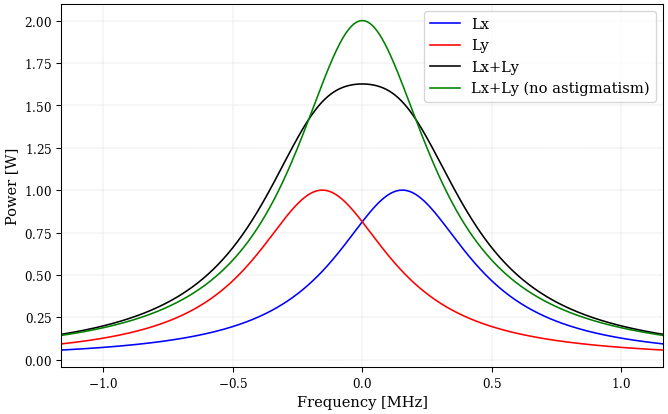

In [41]:
golden = (1 + 5 ** 0.5) / 2

fig = plt.figure(figsize=[5*golden,5])
plt.plot(f_plot,lx)
plt.plot(f_plot,ly)
plt.plot(f_plot,(lx+ly))
plt.plot(f_plot,lz)
plt.grid(True)
plt.ylabel('Power [W]')
plt.xlabel('Frequency [MHz]')
plt.legend(['Lx','Ly','Lx+Ly','Lx+Ly (no astigmatism)'])

# fig.savefig('lorentz_comparison.pdf')
# fig.savefig('lorentz_comparison.png')

plt.show()

In [38]:
np.max(lz)/np.max(lx+ly)

1.2298024584140141

In [39]:
(lorentzian(1,0))/(lorentzian(1,df/fwhm))

1.2298151930028096

In [44]:
aly = np.linspace(0, 1, 301)
alx = np.ones(301)

lxs = np.outer(alx, lorentzian(fwhm, f, deltafx*m))
lys = np.outer(aly, lorentzian(fwhm, f, deltafy*m))

lls = lxs+lys

(<matplotlib.image.AxesImage at 0x7f0104ad3d60>,
 <matplotlib.colorbar.Colorbar at 0x7f0101846220>)

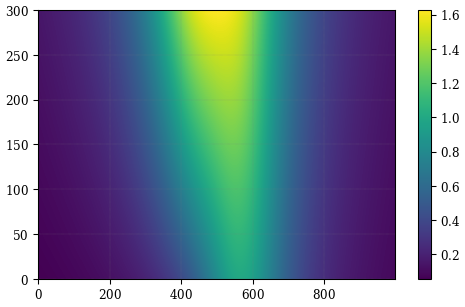

In [47]:
mpf.imshow(lls)

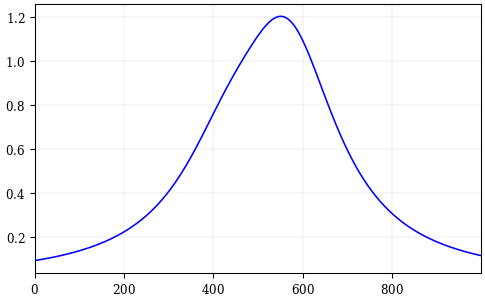

In [60]:
plt.plot(lls[110,:])

Text(0.5, 1.0, 'Peak height correction factor from OMC astigmatism')

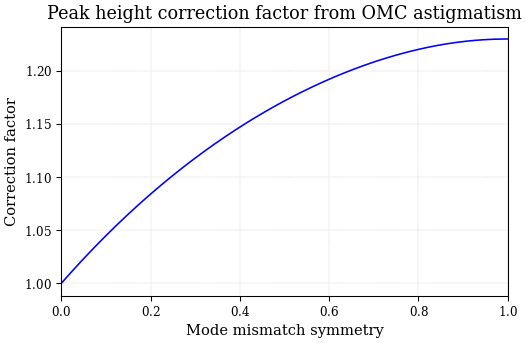

In [66]:
plt.plot(aly, (aly+alx)/np.max(lls,axis=1))
plt.ylabel('Correction factor')
plt.xlabel('Mode mismatch symmetry')
plt.title('Peak height correction factor from OMC astigmatism')

In [350]:
import sympy as sp

In [351]:
x = sp.symbols('x')

In [354]:
l0 = 1/(2*sp.pi)* 1/((0)**2+(sp.Integer(1)/2)**2)
ls = 1/(2*sp.pi)* 1/((x/2)**2+(sp.Integer(1)/2)**2)

In [356]:
(l0/ls)

x**2 + 1

In [357]:
((2*deltafx - 2*deltafy)/(fwhm))**2 + 1

1.2298151930028096

# Finding the point where the sum of two peaks is resolvable

In [363]:
f = np.linspace(-1,1,1000)*fwhm*2

s = 1/(np.sqrt(3)) # derived from maxima

lx = lorentzian(fwhm,f,-fwhm/2*s)*Power
ly = lorentzian(fwhm,f,fwhm/2*s)*Power
lz = 2*lorentzian(fwhm,f,0)*Power

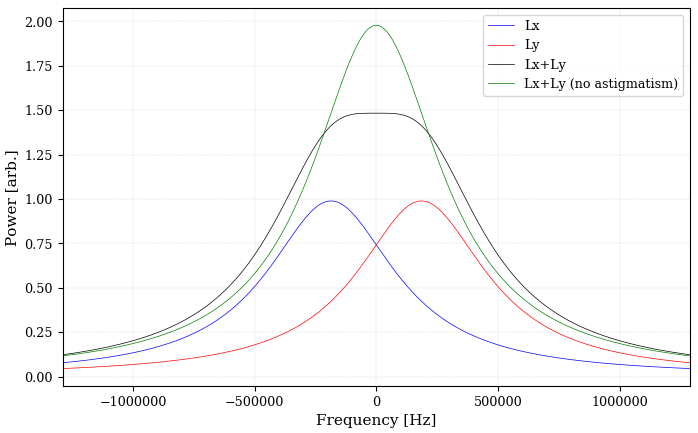

In [364]:
fig = plt.figure(figsize=[5*golden,5])
plt.plot(f,lx,lw=0.5)
plt.plot(f,ly,lw=0.5)
plt.plot(f,(lx+ly),lw=0.5)
plt.plot(f,lz,lw=0.5)
plt.grid(True)
plt.ylabel('Power [arb.]')
plt.xlabel('Frequency [Hz]')
plt.legend(['Lx','Ly','Lx+Ly','Lx+Ly (no astigmatism)'])

plt.show()

## Want second derivative to be zero at x=0

In [42]:
lx = lorentzian(fwhm,f,-fwhm/2*s)
ly = lorentzian(fwhm,f,fwhm/2*s)
plt.plot(f,np.gradient(np.gradient(lx+ly)))
# plt.ylim([-1e-6,2e-6])
# plt.xlim([-fwhm/10,fwhm/10])
plt.show()

NameError: name 's' is not defined